# Color Threshold Green Screen

### import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

In [2]:
# read in image
image=mpimg.imread('images/car_green_screen.jpg')
# print out the image dimensions (height,weight and depth (color))
print('Image dimension:',image.shape)

Image dimension: (450, 660, 3)


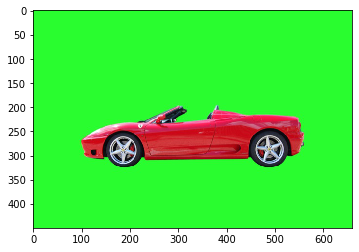

In [3]:
#Display the image
plt.imshow(image)

In [32]:
# Define our color selection boundaries in RGB values
lower_green=np.array([0,240,0])
upper_green=np.array([130,255,130])

## create a mask


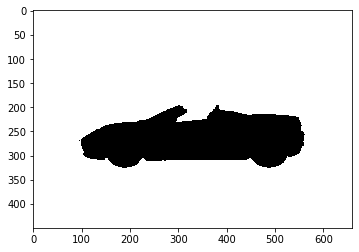

In [33]:
# Define the masked area
mask=cv2.inRange(image,lower_green,upper_green)
# visualize the mask
plt.imshow(mask,cmap='gray')

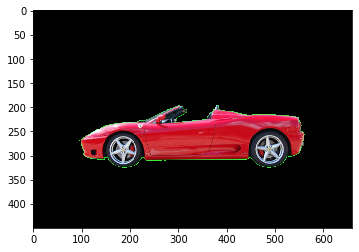

In [34]:
# mask the image to let the imahe show through
masked_image=np.copy(image)
masked_image[mask!=0]=[0,0,0]

# display it
plt.imshow(masked_image)

### mask and add a background image

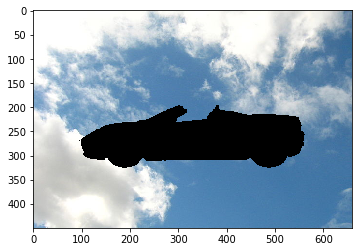

In [36]:
# Load in a background image  and convert it into RGB
background_image=cv2.imread('images/sky.jpg')
background_image=cv2.cvtColor(background_image,cv2.COLOR_BGR2RGB)
#crop it to the right size(450x660)
crop_background=background_image[0:450,0:660]

# mask the cropped background so that the car  area is blocked
crop_background[mask==0]=[0,0,0]

# display the background
plt.imshow(crop_background)

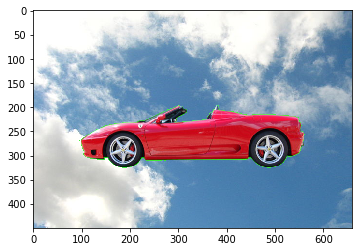

In [37]:
# create the  complete image
complete_image=masked_image+crop_background
# display
plt.imshow(complete_image)